# Explored Various Color Spaces and Hog etc.

## Load Data

Total Cars: 8795
Total Additional Cars: 3
Total Non-Cars: 9495
Total Additional Cars: 527
Total Data: 18290
Total Training: 14632
Total Test: 3658


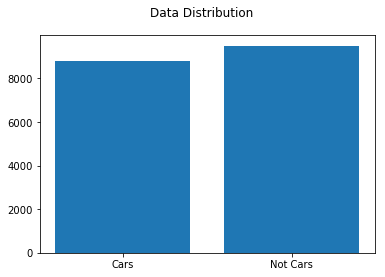

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

cars = glob.glob('./vehicles/**/*.png', recursive=True)
cars.extend(glob.glob('./vehicles/**/*.jpeg', recursive=True))

add_cars = glob.glob('./additional_data/cars_from_video/*.jpeg')
cars.extend(add_cars)
            
notcars = glob.glob('./non-vehicles/**/*.png', recursive=True)
notcars.extend(glob.glob('./non-vehicles/**/*.jpeg', recursive=True))
add_notcars = glob.glob('./additional_data/notcars_from_video/*.jpeg')

notcars.extend(add_notcars)
               
count = len(cars) + len(notcars)

print('Total Cars:', len(cars))
print('Total Additional Cars:', len(add_cars))
print('Total Non-Cars:', len(notcars))
print('Total Additional Cars:', len(add_notcars))
print('Total Data:', count)
print('Total Training:', int(count * 0.8))
print('Total Test:', int(count * 0.2))

data = [len(cars), len(notcars)]
index = np.arange(2)
plt.bar(index, data)
plt.xticks(index, ('Cars', 'Not Cars'))
plt.suptitle('Data Distribution')
plt.show()

## Color Space Exploration

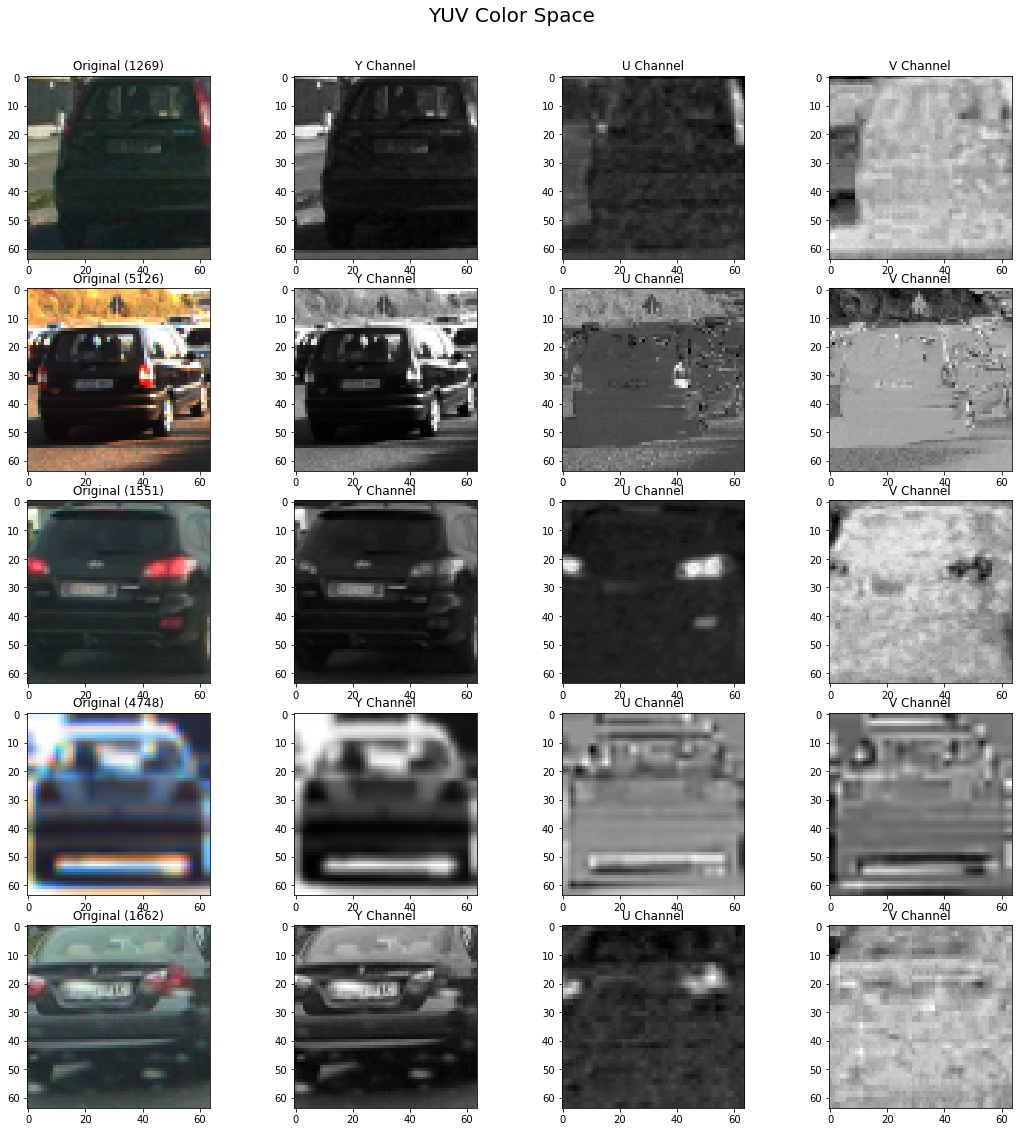

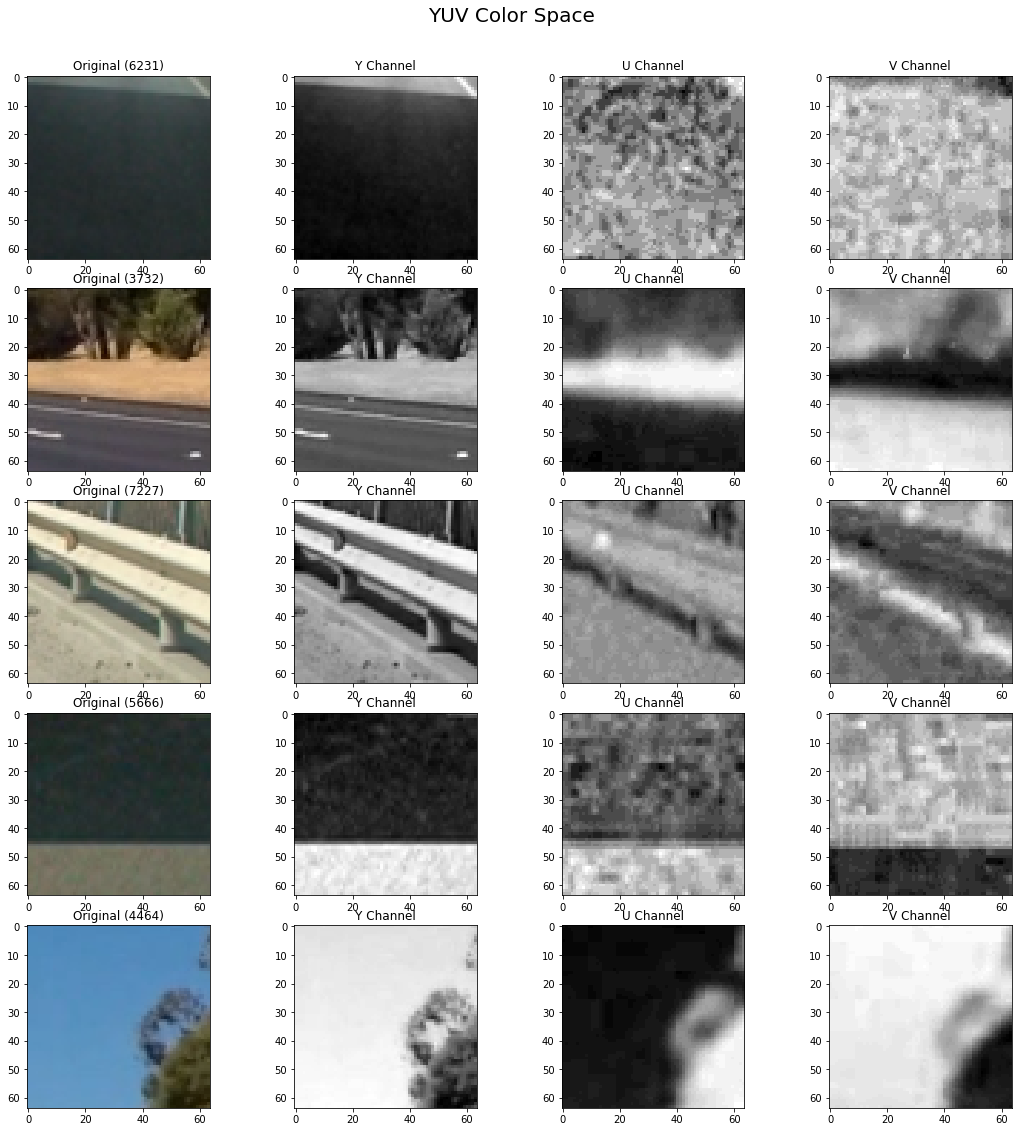

In [3]:
from lesson_functions import *

color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

def display_random(filenames, n_samples):
    f, ax = plt.subplots(n_samples, 4, figsize=(15,16))
    f.tight_layout()
    f.subplots_adjust(top=0.92)
    f.suptitle(color_space + " Color Space", fontsize=20)

    indices = np.random.choice(len(filenames), n_samples, replace=False)
    
    for i in range(n_samples):
        index = indices[i]
        img = load_image(filenames[index], color_space)
        rgb = load_image(filenames[index], 'RGB')

        ax[i,0].imshow(rgb)
        ax[i,0].set_title('Original ({})'.format(index))

        for j in range(3):
            ax[i,1 + j].imshow(img[:,:,j], cmap='gray')
            ax[i,1 + j].set_title(color_space[j] + ' Channel')

display_random(cars, 5)
display_random(notcars, 5)
plt.show()

## Hog Testing

Using colorspace YUV


C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


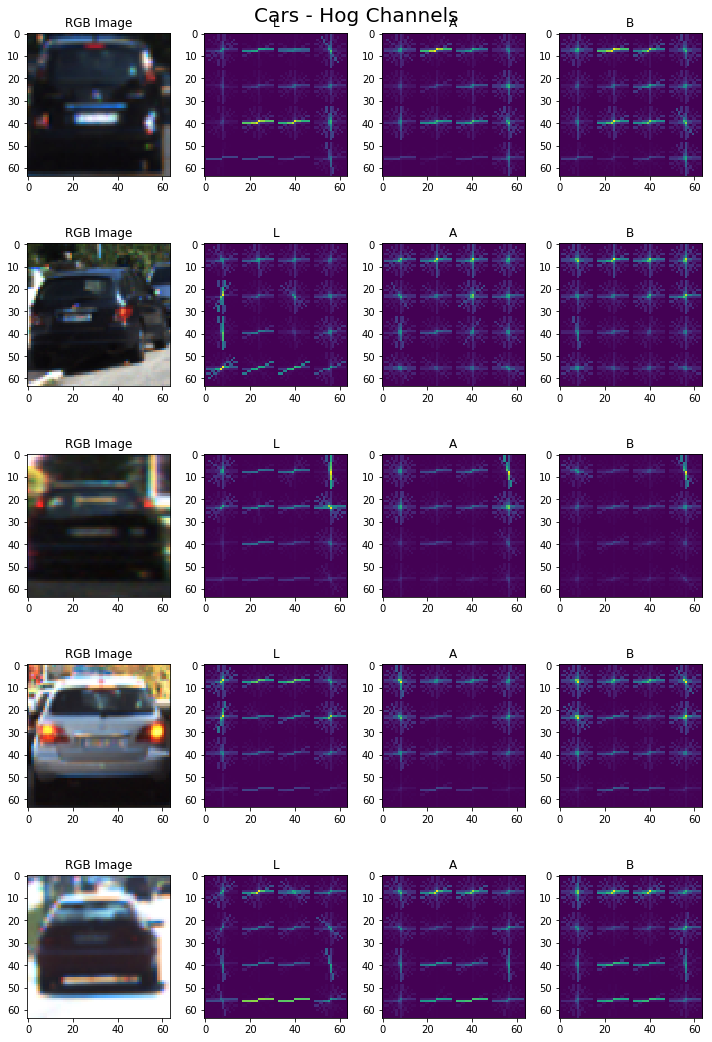

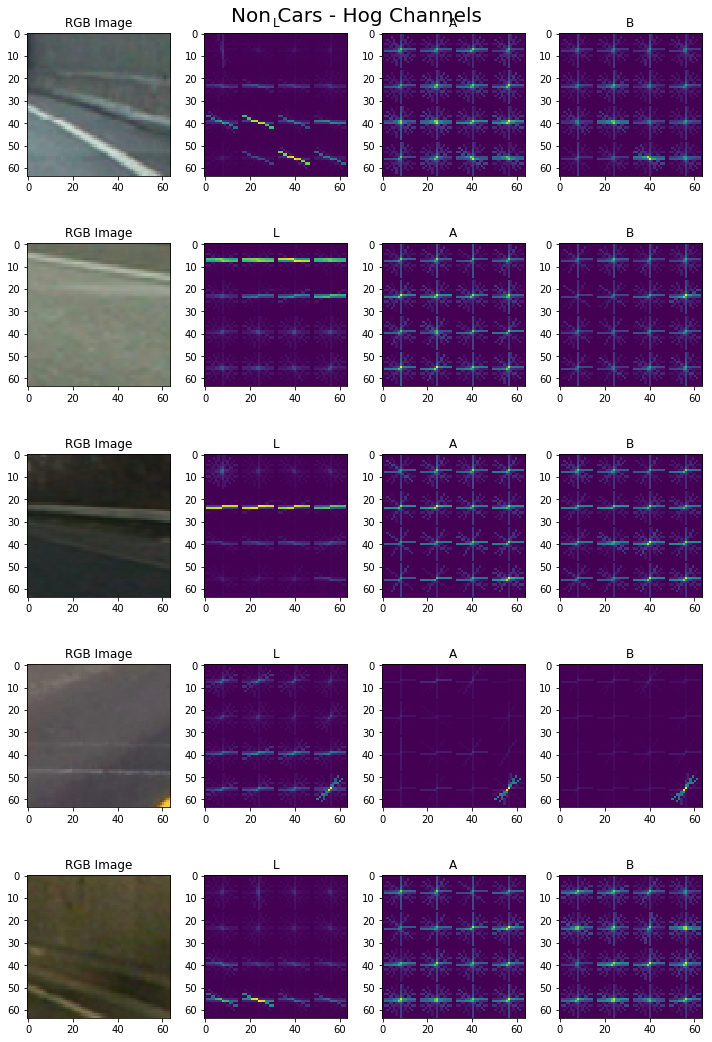

In [4]:
orient = 11
pix_per_cell = 16
cell_per_block = 2

n_samples = 5

def show_hog(title, filenames):
    indices = np.random.choice(len(filenames), n_samples)
    
    f, ax = plt.subplots(n_samples, 4, figsize=(10,15))
    f.tight_layout()
    f.suptitle(title, fontsize=20)

    for i in range(n_samples):
        index = indices[i]

        img_cs = load_image(filenames[index], color_space)
        c1 = img_cs[:,:,0]
        c2 = img_cs[:,:,1]
        c3 = img_cs[:,:,2]
        
        _, hog_img_c1 = get_hog_features(c1, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True, feature_vec = False)
        _, hog_img_c2 = get_hog_features(c2, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True)
        _, hog_img_c3 = get_hog_features(c3, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True)
        
        img = cv2.cvtColor(img_cs, eval('cv2.COLOR_' + color_space + '2RGB'))
        
        ax[i,0].imshow(img)
        ax[i,0].set_title('RGB Image')
        ax[i,1].imshow(hog_img_c1)
        ax[i,1].set_title('L')
        ax[i,2].imshow(hog_img_c2)
        ax[i,2].set_title('A')
        ax[i,3].imshow(hog_img_c3)
        ax[i,3].set_title('B')
            
    f.tight_layout()
    return indices

print('Using colorspace', color_space)
car_indices = show_hog('Cars - Hog Channels', cars)
notcar_indices = show_hog('Non Cars - Hog Channels', notcars)

plt.show()

C:\Users\fahad\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


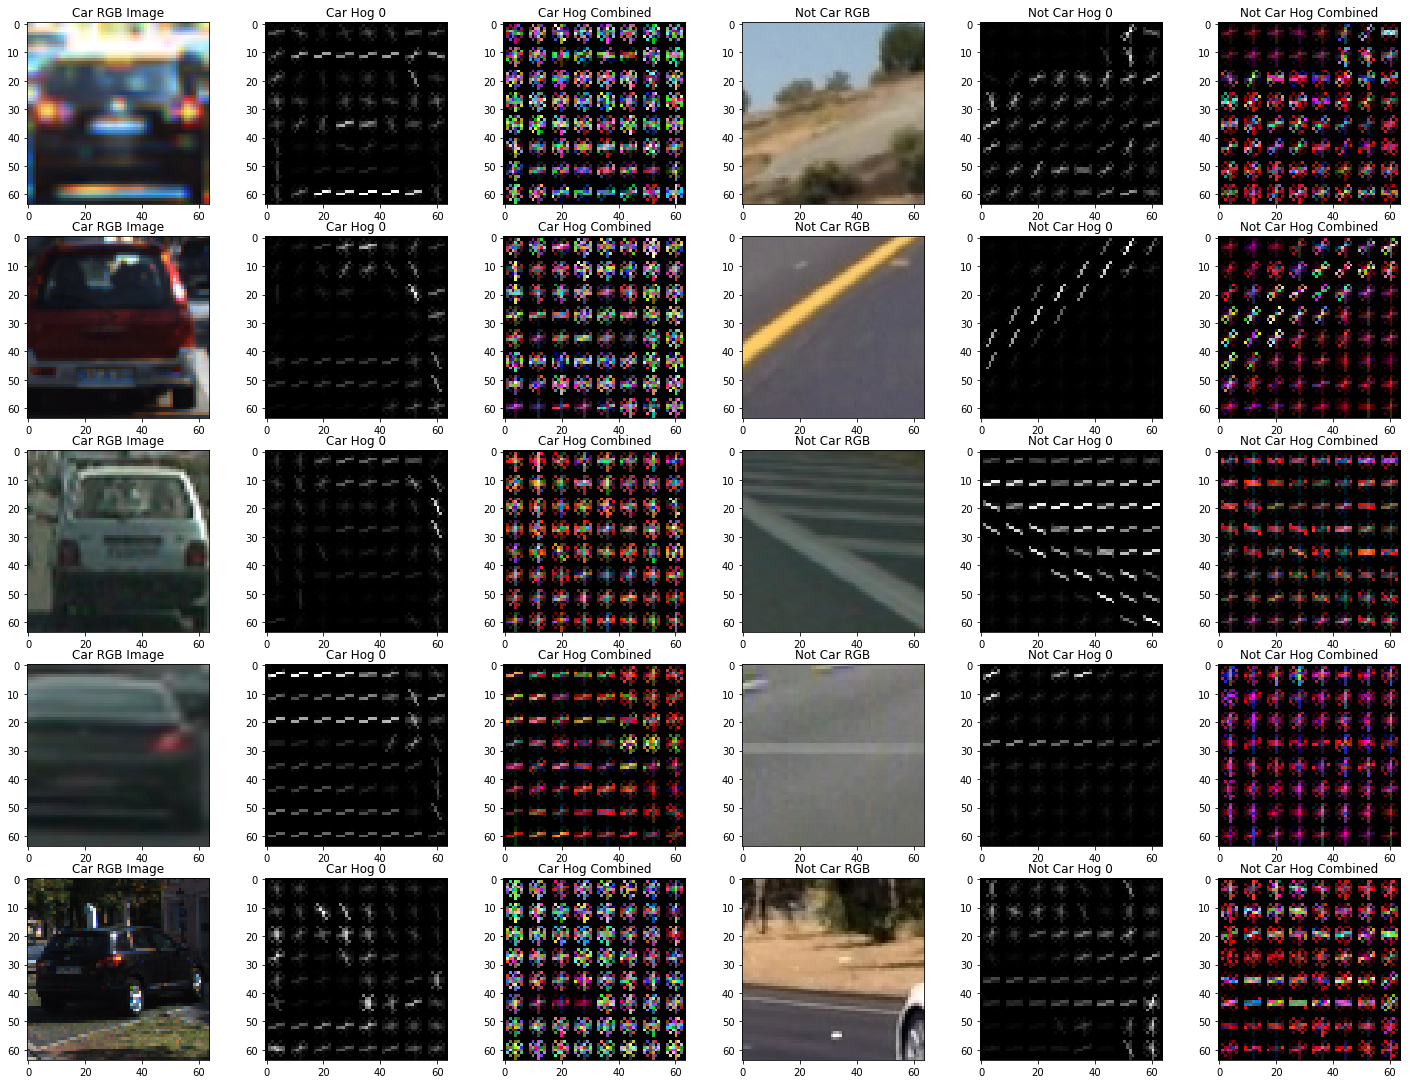

In [5]:
%matplotlib inline

orient = 9
pix_per_cell = 8
cell_per_block = 4

n_samples = 5
car_indices = np.random.choice(len(cars), n_samples)
notcar_indices = np.random.choice(len(cars), n_samples)
    
f, ax = plt.subplots(n_samples, 6, figsize=(20,15))
f.tight_layout()

for i in range(n_samples):
    car_img_cs = load_image(cars[car_indices[i]], color_space)
    _, car_hog_img = single_img_features(car_img_cs, 
                                           orient = orient,
                                           pix_per_cell = pix_per_cell,
                                           cell_per_block = cell_per_block,
                                           hog_channel = 'ALL',
                                           hist_feat = False,
                                           spatial_feat = False,
                                           vis=True)
    
    notcar_img_cs = load_image(notcars[notcar_indices[i]], color_space)
    _, notcar_hog_img = single_img_features(notcar_img_cs,
                                           orient = orient,
                                           pix_per_cell = pix_per_cell,
                                           cell_per_block = cell_per_block,
                                           hog_channel = 'ALL',
                                           hist_feat = False,
                                           spatial_feat = False,
                                           vis=True)
    
    car_img = cv2.cvtColor(car_img_cs, eval('cv2.COLOR_' + color_space + '2RGB'))
    notcar_img = cv2.cvtColor(notcar_img_cs, eval('cv2.COLOR_' + color_space + '2RGB'))
    
    ax[i,0].imshow(car_img)
    ax[i,0].set_title('Car RGB Image')
    ax[i,1].imshow(car_hog_img[:,:,0], cmap='gray')
    ax[i,1].set_title('Car Hog 0')
    ax[i,2].imshow(car_hog_img)
    ax[i,2].set_title('Car Hog Combined')
    
    ax[i,3].imshow(notcar_img)
    ax[i,3].set_title('Not Car RGB')
    ax[i,4].imshow(notcar_hog_img[:,:,0], cmap='gray')
    ax[i,4].set_title('Not Car Hog 0')
    ax[i,5].imshow(notcar_hog_img)
    ax[i,5].set_title('Not Car Hog Combined')

    

## Size Reduction for Spatial_Size

In [ ]:
n_samples = 5

def show_resize(title, filenames):
    indices = np.random.choice(len(filenames), n_samples)
    
    f, ax = plt.subplots(n_samples, 3, figsize=(10,16))
    f.tight_layout()
    f.suptitle(title, fontsize=20)
    f.subplots_adjust(top=0.92)
    
    for i in range(n_samples):
        index = indices[i]

        img = []
        img.append(load_image(filenames[index], 'RGB'))
        img.append(cv2.resize(img[0], (32,32)))
        img.append(cv2.resize(img[0], (16,16)))
        
        for j in range(len(img)):
            ax[i,j].imshow(img[j])
            ax[i,j].set_title(img[j].shape)

show_resize('Cars - Resize', cars)
show_resize('Non Cars - Resize', notcars)
plt.show()

## Spatial Binning

In [ ]:
n_samples = 5

def show_binning(title, filenames):
    indices = np.random.choice(len(filenames), n_samples)
    
    f, ax = plt.subplots(n_samples, 2, figsize=(10,15))
    f.tight_layout()
    f.suptitle(title, fontsize=20)
    f.subplots_adjust(top=0.92)
    
    for i in range(n_samples):
        index = indices[i]

        img_cs = load_image(filenames[index], color_space)
        histogram = color_hist(img_cs)
        
        ax[i,0].imshow(img_cs)
        ax[i,1].plot(histogram)
        
show_binning('Cars - Binning', cars)
show_binning('Non Cars - Binning', notcars)
plt.show()


In [ ]:
# def show_grad(filenames, index):
#     #gray = load_image(filenames[index], 'GRAY')
#     img = load_image(filenames[index], 'LAB')
#     gray = img[:,:,0]
#     img = cv2.GaussianBlur(gray, (3,3), 0)
    
#     laplacian = cv2.Laplacian(img, cv2.CV_64F)
#     sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
#     sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
#     f, ax = plt.subplots(1, 4, figsize=(10,5))
#     ax[0].imshow(img, cmap='gray')
#     ax[1].imshow(laplacian, cmap='gray')
#     ax[2].imshow(sobelx, cmap='gray')
#     ax[3].imshow(sobely, cmap='gray')

# def get_laplacian_hog(channel, visualise = False, ravel = False):
#     laplacian = get_laplacian(channel)
#     hog_laplacian = hog(laplacian, orientations=9, 
#                             pixels_per_cell=(8, 8),
#                             cells_per_block=(2, 2), 
#                             transform_sqrt=False, 
#                             visualise=visualise, 
#                             feature_vector=False,
#                             block_norm='L2-Hys')
    
#     if ravel == True:
#         return np.ravel(hog_laplacian)
    
#     return hog_laplacian
    
# def show_laplac(title, filenames):
#     indices = np.random.choice(len(filenames), n_samples)
    
#     f, ax = plt.subplots(n_samples, 3, figsize=(20,16))
#     f.tight_layout()
#     f.suptitle(title, fontsize=20)
#     f.subplots_adjust(top=0.92)

#     orient = 9  # HOG orientations
#     pix_per_cell = 8 # HOG pixels per cell
#     cell_per_block = 2 # HOG cells per block

#     for i in range(n_samples):
#         index = indices[i]
        
#         img = load_image(filenames[index], 'LAB')
#         L = img[:,:,0]

#         _, hog_img_l = get_laplacian_hog(L, visualise=True)

#         laplacian = get_laplacian(L)

#         ax[i,0].imshow(img, cmap='gray')
#         ax[i,0].set_title('L Channel')
#         ax[i,1].imshow(laplacian, cmap='gray')
#         ax[i,1].set_title('Laplacan ' + str(laplacian.shape))
#         ax[i,2].imshow(hog_img_l, cmap='gray')
#         ax[i,2].set_title('Hog ' + str(hog_img_l.shape))

        
# show_laplac('Cars Laplacian', cars)
# show_laplac('Non Cars Laplacian', notcars)

# plt.show()

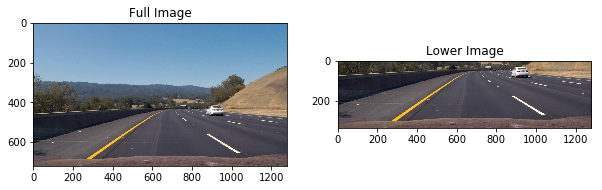

In [14]:
import matplotlib.pyplot as plt
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

img = load_image('./test_images/test3.jpg', "RGB")
lower = img[380:,:]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(img)
ax1.set_title('Full Image')
ax2.imshow(lower)
ax2.set_title('Lower Image')
plt.show()